In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [13]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Reference
1) https://towardsdatascience.com/computer-vision-detecting-objects-using-haar-cascade-classifier-4585472829a9
2) https://stackoverflow.com/questions/30508922/error-215-empty-in-function-detectmultiscale
3) https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=lIYdn1woOS1n

# Download Images from Kaggle

In [ ]:
os.chdir("/content/drive/MyDrive/LablFiles/AdvancedVision/Project1_Part2/")

In [ ]:
!kaggle datasets download -d ciplab/real-and-fake-face-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! pip install -q kaggle

In [ ]:
! chmod 600 kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-15 20:16:36          12246  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7437  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3027  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2900  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d ciplab/real-and-fake-face-detection

 98% 423M/431M [00:04<00:00, 105MB/s] 
100% 431M/431M [00:04<00:00, 108MB/s]


In [ ]:
! unzip real-and-fake-face-detection.zip -d images

Archive:  real-and-fake-face-detection.zip
  inflating: images/real_and_fake_face/training_fake/easy_100_1111.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_101_0010.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_102_0101.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_103_1111.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_104_1000.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_105_1100.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_106_0011.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_107_1011.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_108_1111.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_109_1111.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_10_0001.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_110_0001.jpg  
  inflating: images/real_and_fake_face/training_fake/easy_111_1101.jpg  
  inflati

# DataSet Observation

The data set consists of real and fake image.
I will be using real image data set

# Read Image Data

In [3]:
imagesPath = "/content/drive/MyDrive/LablFiles/AdvancedVision/Project1_Part2/images/real_and_fake_face/training_real/"

In [4]:
import os,cv2,keras, glob

In [5]:
data_path = os.path.join(imagesPath,'*g')

In [17]:
data_path

'/content/drive/MyDrive/LablFiles/AdvancedVision/Project1_Part2/images/real_and_fake_face/training_real/*g'

In [7]:
imageFiles = glob.glob(imagesPath +'/*g')

In [8]:
len(imageFiles)

1081

In [9]:
imageFiles[0]

'/content/drive/MyDrive/LablFiles/AdvancedVision/Project1_Part2/images/real_and_fake_face/training_real/real_00042.jpg'

In [10]:
#Lets consider ony 50 images
imglst = imageFiles[:50]

# Read Face Data for One image

Lets first build logic for reading boundry box for one image

In [35]:
from google.colab.patches import cv2_imshow

In [29]:
#n = 0 # any iamge from the imglst
n = np.random.randint(0, len(imglst)-1)
image1= cv2.imread(imglst[n]) 
grayImage = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
face_detect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_detect.detectMultiScale(grayImage, 1.0485258, 6)

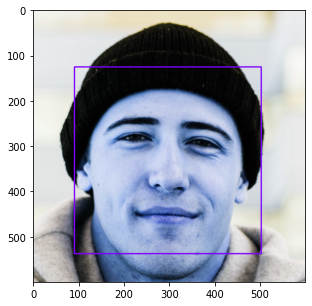

xmin - 91
ymin - 125
xmax - 503
ymax - 537


In [30]:
if faces is ():
    print("No faces found")
for (x,y,w,h) in faces:
    cv2.rectangle(image1, (x,y), (x+w,y+h), (127,0,255), 2)
    #cv2_imshow(image1)
    plt.figure(figsize=(5,5))
    plt.imshow(image1)
    plt.show()

print("xmin -",x)
print("ymin -",y)
print("xmax -",x+w)
print("ymax -",y+h)

# Testing of logic

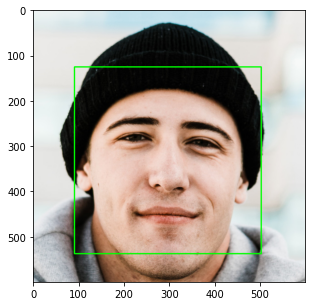

In [31]:
#Read the image
img = cv2.imread(imglst[n])
#Draw rectangle(s) as per x,y,w,h extracted in above section
xmin, ymin, xmax, ymax = x, y, x+w, y+h
#Add bounding box
cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Draw image using matplotlib
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

# Read multiple image data and create data frame

In [19]:
dfImg = pd.DataFrame(columns={'filename','height','width','xmin','ymin','xmax','ymax'})

In [20]:
for i in imglst :
  image1= cv2.imread(i) 
  grayImage = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  face_detect = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  faces = face_detect.detectMultiScale(grayImage, 1.0485258, 6)
  if faces is ():
    continue        # no face found We can log such filenames/filename in log file to check what exactly file is and why face was not found
  for (x,y,w,h) in faces:
    dfImg = dfImg.append({'filename':i,'height':h,'width':w,
                    'xmin':x,'ymin':y,'xmax':x+w,'ymax':y+h}, ignore_index=True)

In [21]:
dfImg.head()

width ymax height  ... ymin xmax xmin
0   418  541    418  ...  123  569  151
1   436  565    436  ...  129  489   53
2   438  554    438  ...  116  497   59
3    51  435     51  ...  384   80   29
4   359  545    359  ...  186  482  123

[5 rows x 7 columns]

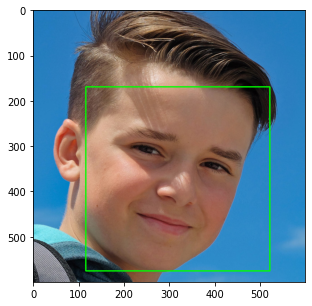

In [28]:
n = np.random.randint(0, dfImg.shape[0])
img_file = dfImg.loc[n,'filename']
#Read the image
img = cv2.imread(img_file)
rows_with_file = dfImg[dfImg['filename'] == img_file].index.tolist()
for i in rows_with_file:
  #Draw rectangle(s) as per x,y,w,h extracted in above section
  xmin, ymin, xmax, ymax = dfImg.loc[i, ['xmin', 'ymin', 'xmax', 'ymax']]   
  #Add bounding box
  cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Draw image using matplotlib
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

# Save data frame to some permanant storage...like csv

In [27]:
dfImg.to_csv("/content/drive/MyDrive/LablFiles/AdvancedVision/Project1_Part2/ImageData.csv")